# L4: Word embeddings

In this lab you will explore word embeddings. A **word embedding** is a mapping of words to points in a vector space such that nearby words (points) are similar in terms of their distributional properties. You will use word embedding to find similar words, and evaluate their usefulness in an inference task.

You will use the word vectors that come with [spaCy](http://spacy.io). Note that you will need the &lsquo;large&rsquo; English language model; the &lsquo;small&rsquo; model that you used in previous labs does not include proper word vectors.

In [1]:
! python -m spacy download en_core_web_lg 

     |████████████████████████████████| 827.9MB 1.4MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180945 sha256=e976acdbdcade882f0dc8931e7a8aa923ee793481b765a3628ddaf3fa67d154a
  Stored in directory: /tmp/pip-ephem-wheel-cache-wzanls5k/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [2]:
import en_core_web_lg
nlp = en_core_web_lg.load()

In [3]:
'''import spacy

nlp = spacy.load('en_core_web_lg')'''

"import spacy\n\nnlp = spacy.load('en_core_web_lg')"

Every word in the model&rsquo;s vocabulary comes with a 300-dimensional vector, represented as a NumPy array. The following code cell shows how to access the vector for the word *cheese*:

In [4]:
nlp.vocab['cheese'].vector

array([-5.5252e-01,  1.8894e-01,  6.8737e-01, -1.9789e-01,  7.0575e-02,
        1.0075e+00,  5.1789e-02, -1.5603e-01,  3.1941e-01,  1.1702e+00,
       -4.7248e-01,  4.2867e-01, -4.2025e-01,  2.4803e-01,  6.8194e-01,
       -6.7488e-01,  9.2401e-02,  1.3089e+00, -3.6278e-02,  2.0098e-01,
        7.6005e-01, -6.6718e-02, -7.7794e-02,  2.3844e-01, -2.4351e-01,
       -5.4164e-01, -3.3540e-01,  2.9805e-01,  3.5269e-01, -8.0594e-01,
       -4.3611e-01,  6.1535e-01,  3.4212e-01, -3.3603e-01,  3.3282e-01,
        3.8065e-01,  5.7427e-02,  9.9918e-02,  1.2525e-01,  1.1039e+00,
        3.6678e-02,  3.0490e-01, -1.4942e-01,  3.2912e-01,  2.3300e-01,
        4.3395e-01,  1.5666e-01,  2.2778e-01, -2.5830e-02,  2.4334e-01,
       -5.8136e-02, -1.3486e-01,  2.4521e-01, -3.3459e-01,  4.2839e-01,
       -4.8181e-01,  1.3403e-01,  2.6049e-01,  8.9933e-02, -9.3770e-02,
        3.7672e-01, -2.9558e-02,  4.3841e-01,  6.1212e-01, -2.5720e-01,
       -7.8506e-01,  2.3880e-01,  1.3399e-01, -7.9315e-02,  7.05

## Problem 1: Finding similar words

Your first task is to use the word embeddings to find similar words. More specifically, we ask you to write a function `most_similar` that takes a vector $x$ and returns a list with the 10 most similar entries in spaCy&rsquo;s vocabulary, with similarity being defined by cosine.

**Tip:** spaCy already has a [`most_similar`](https://spacy.io/api/vectors#most_similar) method that you can wrap.

In [5]:
def most_similar(x,n=10):
    queries = x.reshape((1,300))
    res = nlp.vocab.vectors.most_similar(queries, n=n)
    sm = [nlp.vocab.__getitem__(x) for x in res[0][0]]
    return sm

Test your implementation by running the following code cell, which will print the 10 most similar words for the word *cheese*:

In [6]:
print(' '.join(w.text for w in most_similar(nlp.vocab['cheese'].vector)))

Cheese CHEESE cheese Cheddar cheddar CHEDDAR BACON Bacon bacon cheeses


You should get the following output:

CHEESE cheese Cheese Cheddar cheddar CHEDDAR BACON Bacon bacon cheeses

Once you have a working implementation of `most_similar`, use it to think about in what sense the returned words really are &lsquo;similar&rsquo; to the cue word. Try to find examples where the cue word and at least one of the words returned by `most_similar` are in the following semantic relations:

1. synonymy (exchangeable meanings)
2. antonymy (opposite meanings)
3. hyperonymy/hyponymy (more specific/less specific meanings)

Document your examples in the code cell below.

In [7]:
similar_words1 = [w.text for w in most_similar(nlp.vocab['apple'].vector)]
print(similar_words1)

['APPLE', 'apple', 'Apple', 'apples', 'APPLES', 'Apples', 'Blackberry', 'blackberry', 'BlackBerry', 'BLACKBERRY']


In [8]:
similar_words2 = [w.text for w in most_similar(nlp.vocab['shirt'].vector)]
print(similar_words2)

['Shirt', 'SHIRT', 'shirt', 'Shirts', 'SHIRTS', 'shirts', 't-shirt', 'T-shirt', 'T-SHIRT', 'T-Shirt']


In the above examples, blackbery which can be considered as an antonym of apple was the most similar to apple after the other words which have exchangeable meaning words. In the second example, t-shirt was obtained as the most similar word to shirt which is a hyperonym to shirt. The first 6 words obtained in both the cases are the synonyms. 

## Problem 2: Plotting similar words

Your next task is to visualize the word embedding space by a plot. To do so, you will have to reduce the dimensionality of the space from 300 to 2&nbsp;dimensions. One suitable algorithm for this is [T-distributed Stochastic Neighbor Embedding](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) (TSNE), which is implemented in scikit-learn&rsquo;s [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) class.

Write a function `plot_most_similar` that takes a list of words (lexemes) and does the following:

1. For each word in the list, find the most similar words (lexemes) in the spaCy vocabulary.
2. Compute the TSNE transformation of the corresponding vectors to 2&nbsp;dimensions.
3. Produce a scatter plot of the transformed vectors, with the vectors as points and the corresponding word forms as labels.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
def plot_most_similar(word_list):
    v = []
    sim_word_list = []
    for word in word_list:
        w1 = word.vector
        sim_word = most_similar(w1)
        sim_word_list.extend(sim_word)
        for sw in sim_word:
            v.append(np.array(sw.vector.reshape((1,300))[0]).reshape((1,300)))
    v1 = np.array([v[i][0] for i in range(len(v))])
    v1_embedding = TSNE(n_components=2).fit_transform(v1)
    v1_embedding = np.array(v1_embedding)
    
    # Plotting each word against it's features
    for i in range(50):
        if i < 9:
            plt.scatter(v1_embedding[:,0][i],v1_embedding[:,1][i],c = "blue")
        elif i == 9:
            plt.scatter(v1_embedding[:,0][i],v1_embedding[:,1][i],c = "blue",label = "cheese")
        elif i >= 10 and i < 19:
            plt.scatter(v1_embedding[:,0][i],v1_embedding[:,1][i],c = "red")
        elif i == 19:
            plt.scatter(v1_embedding[:,0][i],v1_embedding[:,1][i],c = "red",label = "goat")
        elif i >= 20 and i < 29:
            plt.scatter(v1_embedding[:,0][i],v1_embedding[:,1][i],c = "black")
        elif i == 29:
            plt.scatter(v1_embedding[:,0][i],v1_embedding[:,1][i],c = "black",label = "sweden")
        elif i >= 30 and i < 39:
            plt.scatter(v1_embedding[:,0][i],v1_embedding[:,1][i],c = "green")
        elif i == 39:
            plt.scatter(v1_embedding[:,0][i],v1_embedding[:,1][i],c = "green",label = "university")
        elif i >= 40 and i < 49:
            plt.scatter(v1_embedding[:,0][i],v1_embedding[:,1][i],c = "yellow")
        elif i == 49:
            plt.scatter(v1_embedding[:,0][i],v1_embedding[:,1][i],c = "yellow",label = "computer")
    plt.legend()

Test your code by running the following cell:

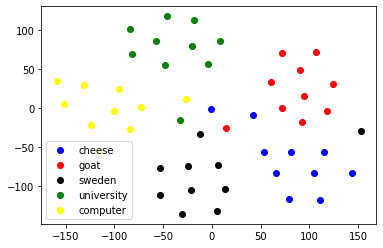

In [10]:
plot_most_similar(nlp.vocab[w] for w in ['cheese', 'goat', 'sweden', 'university', 'computer'])

Take a few minutes to look at your plot. What does it tell you? What does it *not* tell you?

The plot says that the words that are most similar are close to each other though there can be some execptions. It however does not tell that the words which are far are not related, could be most similar than the words that are actually related.

## Problem 3: Analogies

In a **word analogy task** you are given three words $x$, $y$, $z$ and have to predict a word $w$ that has the same semantic relation to $z$ as $y$ has to $x$. One example is *man*, *woman*, *brother*, the expected answer being *sister* (the semantic relation is *male*/*female*).

[Mikolov et al. (2013)](http://www.aclweb.org/anthology/N13-1090) have shown that some types of word analogy tasks can be solved by adding and substracting word vectors in a word embedding: the vector for *sister* is the closest vector (in terms of cosine distance) to the vector *brother* $-$ *man* $+$ *woman*. Your next task is to write a function `fourth` that takes in three words (say *brother*, *man*, *woman*) and predicts the word that completes the analogy (in this case, *sister*).

In [11]:
def fourth(x,y,z):
    w = x.vector - y.vector + z.vector
    sm = most_similar(w,n=1)
    return sm[0]

Test your code by running the following code. You should get *sister*.

In [12]:
fourth(nlp.vocab['brother'], nlp.vocab['man'], nlp.vocab['woman']).text

'SISTER'

In [13]:
fourth(nlp.vocab['Stockholm'], nlp.vocab['Sweden'], nlp.vocab['Germany']).text

'BERLIN'

In [14]:
fourth(nlp.vocab['Swedish'], nlp.vocab['Sweden'], nlp.vocab['France']).text

'FRENCH'

In [15]:
fourth(nlp.vocab['better'], nlp.vocab['good'], nlp.vocab['bad']).text

'WORSE'

In [16]:
fourth(nlp.vocab['walked'], nlp.vocab['Walk'], nlp.vocab['take']).text

'TOOK'

You should also be able to get the following:

* *Stockholm* $-$ *Sweden* $+$ *Germany* $=$ *Berlin*
* *Swedish* $-$ *Sweden* $+$ *France* $=$ *French*
* *better* $-$ *good* $+$ *bad* $=$ *worse*
* *walked* $-$ *walk* $+$ *take* $=$ *took*

Experiment with other examples to see whether you get the expected output. Provide three examples of analogies for which the model produces the &lsquo;correct&rsquo; answer, and three examples on which the model &lsquo;failed&rsquo;. Based on your theoretical understanding of word embeddings, do you have a hypothesis as to why the model succeeds/fails in completing the analogy? Discuss this question in a short text.

In [17]:
fourth(nlp.vocab['energy'], nlp.vocab['human'], nlp.vocab['phone']).text

'PHONE'

In [18]:
fourth(nlp.vocab['thoughts'], nlp.vocab['mind'], nlp.vocab['bottle']).text

'BOTTLE'

In [19]:
fourth(nlp.vocab['blue'], nlp.vocab['sky'], nlp.vocab['tree']).text

'TREE'

In [20]:
fourth(nlp.vocab['baby'], nlp.vocab['human'], nlp.vocab['tiger']).text

'TIGER'

The above are few examples where the model of the analogy is correct and the ones where the model fails. Word embeddings works well only if the words have lingustic similarity which are the only similarity that can be guessed by the model analogy. The other analogies like phone needs charge like humans need energy could not be detected by the model as this involves logic behind the analogy.Similarly, tiger baby is a cub while human baby is just baby this also couldnt be understood by the model.

## Natural language inference dataset

In the second part of this lab, you will be evaluating the usefulness of word embeddings in the context of a natural language inference task. The data for this part is the [SNLI corpus](https://nlp.stanford.edu/projects/snli/), a collection of 570k human-written English image caption pairs manually labeled with the labels *Entailment*, *Contradiction*, and *Neutral*. Consider the following sentence pair as an example:

* Sentence 1: A soccer game with multiple males playing.
* Sentence 2: Some men are playing a sport.

This pair is labeled with *Entailment*, because sentence&nbsp;2 is logically entailed (implied) by sentence&nbsp;1 – if sentence&nbsp;1 is true, then sentence&nbsp;2 is true, too. The following sentence pair, on the other hand, is labeled with *Contradiction*, because both sentences cannot be true at the same time.

* Sentence 1: A black race car starts up in front of a crowd of people.
* Sentence 2: A man is driving down a lonely road.

For detailed information about the corpus, refer to [Bowman et al. (2015)](https://www.aclweb.org/anthology/D15-1075/). For this lab, we load the training portion and the development portion of the dataset.

**Note:** Because the SNLI corpus is rather big, we initially only load a small portion (25,000 samples) of the training data. Once you have working code for Problems&nbsp;4–6, you should set the flag `final` to `True` and re-run all cells with the full dataset.

In [22]:
import bz2
import pandas as pd

final_evaluation = False    # TODO: Set to True for the final evaluation!

with bz2.open('train.jsonl.bz2', 'rt') as source:
    if final_evaluation:
        df_train = pd.read_json(source, lines=True)
    else:
        df_train = pd.read_json(source, lines=True)
    print('Number of sentence pairs in the training data:', len(df_train))

with bz2.open('dev.jsonl.bz2', 'rt') as source:
    df_dev = pd.read_json(source, lines=True)
    print('Number of sentence pairs in the development data:', len(df_dev))

Number of sentence pairs in the training data: 549367
Number of sentence pairs in the development data: 9842


In [23]:
df_train = df_train[:25000]

When you inspect the data frames, you will see that we have preprocessed the sentences and separated tokens by spaces. In the columns `tagged1` and `tagged2`, we have added the part-of-speech tags for every token (as predicted by spaCy), also separated by spaces.

In [24]:
df_train.head()

,gold_label,sentence1,tags1,sentence2,tags2
0,neutral,A person on a horse jumps over a broken down a...,DET NOUN ADP DET NOUN VERB ADP DET ADJ ADP NOU...,A person is training his horse for a competiti...,DET NOUN AUX VERB PRON NOUN ADP DET NOUN PUNCT
1,contradiction,A person on a horse jumps over a broken down a...,DET NOUN ADP DET NOUN VERB ADP DET ADJ ADP NOU...,"A person is at a diner , ordering an omelette .",DET NOUN AUX ADP DET NOUN PUNCT VERB DET NOUN ...
2,entailment,A person on a horse jumps over a broken down a...,DET NOUN ADP DET NOUN VERB ADP DET ADJ ADP NOU...,"A person is outdoors , on a horse .",DET NOUN AUX ADV PUNCT ADP DET NOUN PUNCT
3,neutral,Children smiling and waving at camera,NOUN VERB CCONJ VERB ADP NOUN,They are smiling at their parents,PRON AUX VERB ADP PRON NOUN
4,entailment,Children smiling and waving at camera,NOUN VERB CCONJ VERB ADP NOUN,There are children present,PRON AUX NOUN ADJ


## Problem 4: Two simple baselines

Your first task is to establish two simple baselines for the natural language inference task.

### Random baseline

Implement the standard random baseline that generates prediction by sampling from the empirical distribution of the classes in the training data. Write code to evaluate the performance of this classifier on the development data.

In [25]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

dummy_clf = DummyClassifier(strategy="stratified",random_state = 25)
dummy_clf.fit(df_train['sentence1'] + df_train['sentence2'],df_train['gold_label'])
DummyClassifier(strategy='stratified',random_state = 25)
pred_dum = dummy_clf.predict(df_dev['sentence1'] + df_dev['sentence2'])
print("The Prediction score is found to be:",dummy_clf.score(df_dev['sentence1'] + df_dev['sentence2'],df_dev['gold_label']))
print(classification_report(df_dev['gold_label'],pred_dum, target_names=np.unique(df_train['gold_label'])))

The Prediction score is found to be: 0.3409876041454989
               precision    recall  f1-score   support

contradiction       0.34      0.35      0.34      3278
   entailment       0.34      0.34      0.34      3329
      neutral       0.34      0.34      0.34      3235

     accuracy                           0.34      9842
    macro avg       0.34      0.34      0.34      9842
 weighted avg       0.34      0.34      0.34      9842



### One-sided baseline

A second obvious baseline for the inference task is to predict the class label of a sentence pair based on the text of only one of the two sentences, just as in a standard document classification task. Put together a simple [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) + [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) pipeline that implements this idea, train it, and evaluate it on the development data. Is it better to base predictions on sentence&nbsp;1 or sentence&nbsp;2? Why should one sentence be more useful than the other?

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

pipe = Pipeline([("vectorizer", CountVectorizer()), ("classifier", LogisticRegression(max_iter=500))])

# Training sentence 1 
pipe.fit(df_train['sentence1'],df_train['gold_label'])
pred_dum = pipe.predict(df_dev['sentence1'])
print("The Prediction score is found to be:",pipe.score(df_dev['sentence1'],df_dev['gold_label']))
print(classification_report(df_dev['gold_label'],pred_dum, target_names=np.unique(df_train['gold_label'])))

# Training Sentence 2
pipe.fit(df_train['sentence2'],df_train['gold_label'])
pred_dum = pipe.predict(df_dev['sentence2'])
print("The Prediction score is found to be:",pipe.score(df_dev['sentence2'],df_dev['gold_label']))
print(classification_report(df_dev['gold_label'],pred_dum, target_names=np.unique(df_train['gold_label'])))

The Prediction score is found to be: 0.3306238569396464
               precision    recall  f1-score   support

contradiction       0.33      0.25      0.28      3278
   entailment       0.33      0.34      0.34      3329
      neutral       0.33      0.40      0.36      3235

     accuracy                           0.33      9842
    macro avg       0.33      0.33      0.33      9842
 weighted avg       0.33      0.33      0.33      9842

The Prediction score is found to be: 0.6021133915870758
               precision    recall  f1-score   support

contradiction       0.60      0.60      0.60      3278
   entailment       0.59      0.65      0.62      3329
      neutral       0.62      0.56      0.59      3235

     accuracy                           0.60      9842
    macro avg       0.60      0.60      0.60      9842
 weighted avg       0.60      0.60      0.60      9842



The accuracy in case of sentence 2 is better. This could be because the second sentence either supports the first or opposed the first. Hence if we know the first question, we can guess the second one.

## Problem 5: A classifier based on manually engineered features

[Bowman et al., 2015](https://www.aclweb.org/anthology/D15-1075/) evaluate a classifier that uses (among others) **cross-unigram features**. This term is used to refer to pairs of unigrams $(w_1, w_2)$ such that $w_1$ occurs in sentence&nbsp;1, $w_2$ occurs in sentence&nbsp;2, and both have been assigned the same part-of-speech tag.

Your next task is to implement the cross-unigram classifier. To this end, the next cell contains skeleton code for a transformer that you can use as the first component in a classification pipeline. This transformer converts each row of the SNLI data frame into a space-separated string consisting of

* the standard unigrams (of sentence&nbsp;1 or sentence&nbsp;2 – choose whichever performed better in Problem&nbsp;4)
* the cross-unigrams, as described above.

The space-separated string forms a new &lsquo;document&rsquo; that can be passed to a vectorizer in exactly the same way as a standard sentence in Problem&nbsp;4.

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin
from itertools import product

class CrossUnigramsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    # Transform a single row of the dataframe.
    def _transform(self, row):
        
        # Getting tags from the row
        tags1 = np.array(row.tags1.split())
        tags2 = np.array(row.tags2.split())  
        
        tags1 = np.delete(tags1, np.argwhere(tags1 == 'SPACE'))
        tags2 = np.delete(tags2, np.argwhere(tags2 == 'SPACE'))
        
        # Getting sentences from the row
        sentence1 = np.array(row.sentence1.split())
        sentence2 = np.array(row.sentence2.split())
        
        cross_unigrams = []
        
        for uts in np.unique(tags1):# iterating over unique tags in Sentence 1 as this used as the reference to Sentence 2
            ut1 = sentence1[np.where(np.array(tags1) == uts)] # Searching for unique tags in Sentence 1
            ut2 = sentence2[np.where(np.array(tags2) == uts)] # Searching for unique tags in Sentence 2
            
            for cu in list(product(ut1,ut2)):
                cross_unigrams.append(str(cu).replace(' ', ''))
        
        return getattr(row, 'sentence2') + ' ' + ' '.join(cross_unigrams) # Since Sentence 2 accuracy was high in Q4

    def transform(self, X):
        return [self._transform(row) for row in X.itertuples()]

Once you have an implementation of the transformer, extend the pipeline that you built for Problem&nbsp;4, train it, and evaluate it on the development data.

In [28]:
# Cross-unigrams classifier. 
cross_unigram_pipe = Pipeline([("transformer", CrossUnigramsTransformer()), 
                              ("vectorizer", CountVectorizer()), 
                              ("classifier", LogisticRegression(max_iter=2000))])
cross_unigram_pipe.fit(df_train.iloc[:, 1:], df_train['gold_label']) 
y_pred = cross_unigram_pipe.predict(df_dev.iloc[:, 1:])

# Print the classification report.
print('Predictions on unigrams in sentence 2 and manually engineered cross-unigrams')
print(classification_report(df_dev['gold_label'], y_pred))

Predictions on unigrams in sentence 2 and manually engineered cross-unigrams
               precision    recall  f1-score   support

contradiction       0.52      0.55      0.54      3278
   entailment       0.54      0.55      0.55      3329
      neutral       0.54      0.49      0.51      3235

     accuracy                           0.53      9842
    macro avg       0.53      0.53      0.53      9842
 weighted avg       0.53      0.53      0.53      9842



## Problem 6: A classifier based on word embeddings

Your last task in this lab is to build a classifier for the natural language inference task that uses word embeddings. More specifically, we ask you to implement a vectorizer that represents each sentence as the sum of its word vectors – a representation known as the **continuous bag-of-words**. Thus, given that spaCy&rsquo;s word vectors have 300 dimensions, each sentence will be transformed into a 300-dimensional vector. To represent a sentence pair, the vectorizer should concatenate the vectors for the individual sentences; this yields a 600-dimensional vector. This vector can then be passed to a classifier.

The next code cell contains skeleton code for the vectorizer. You will have to implement two methods: one that maps a single sentence to a vector (of length 300), and one that maps a sentence pair to a vector (of length 600).

In [29]:
import numpy as np

from sklearn.base import BaseEstimator, TransformerMixin

class PairedSentenceVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    # Vectorize a single sentence.
    def _transform1(self, sentence):
        res = np.zeros(nlp.vocab.vectors.shape[1])
        for word in sentence:
            res = res + nlp.vocab[word].vector
        return np.zeros(nlp.vocab.vectors.shape[1])

    # Vectorize a single row of the dataframe.
    def _transform2(self, row):
        vector_sentence_1 = self._transform1(row.sentence1)
        vector_sentence_2 = self._transform1(row.sentence2)
        
        return np.concatenate([vector_sentence_1, vector_sentence_2])

    def transform(self, X):
        return np.concatenate(
            [self._transform2(row).reshape(1, -1) for row in X.itertuples()]
        )

Once you have a working implementation, build a pipeline consisting of the new vectorizer and a [multi-layer perceptron classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). This more powerful (compared to logistic regression) classifier is called for here because we do not specify features by hand (as we did in Problem&nbsp;5), but want to let the model learn a good representation of the data by itself. Use 3&nbsp;hidden layers, each with size 300. It suffices to train the classifier for 8&nbsp;iterations (epochs).

In [30]:
from sklearn.neural_network import MLPClassifier

mlp_pipe = Pipeline([("transform" , PairedSentenceVectorizer()),
                    ("clf" , MLPClassifier(hidden_layer_sizes = (300,300,300), 
                    #activation = "logistic" , 
                        max_iter = 8, random_state=45))   
                        ])
mlp_pipe.fit(df_train.iloc[:, 1:], df_train['gold_label'])

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('transform', PairedSentenceVectorizer()),
                ('clf',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(300, 300, 300),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=8, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=45, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False)

In [31]:
y_pred = mlp_pipe.predict(df_dev.iloc[:, 1:])

# Print the classification report.
print('Predictions on unigrams in sentence 2 and manually engineered cross-unigrams')
print(classification_report(df_dev['gold_label'], y_pred))

Predictions on unigrams in sentence 2 and manually engineered cross-unigrams


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

contradiction       0.00      0.00      0.00      3278
   entailment       0.00      0.00      0.00      3329
      neutral       0.33      1.00      0.49      3235

     accuracy                           0.33      9842
    macro avg       0.11      0.33      0.16      9842
 weighted avg       0.11      0.33      0.16      9842



## Problem 7: Final evaluation

Once you have working code for all problems, re-run Problems&nbsp;4–6 with the full training data. This will take quite a while (expect approximately 1&;nbsp;hour on Colab). **Make sure to not overwrite your previous results.** What are your results on the full data? How do they differ from the results that you obtained for the smaller training data? How do you interpret this? Summarize your findings in a short text.

In [33]:
# TODO: Enter your code for the full experiments here
final_evaluation = False    # TODO: Set to True for the final evaluation!

with bz2.open('train.jsonl.bz2', 'rt') as source:
    if final_evaluation:
        df_train = pd.read_json(source, lines=True)
    else:
        df_train = pd.read_json(source, lines=True)
    print('Number of sentence pairs in the training data:', len(df_train))

with bz2.open('dev.jsonl.bz2', 'rt') as source:
    df_dev = pd.read_json(source, lines=True)
    print('Number of sentence pairs in the development data:', len(df_dev))

Number of sentence pairs in the training data: 549367
Number of sentence pairs in the development data: 9842


In [34]:
# Random Baseline with full data

dummy_clf = DummyClassifier(strategy="stratified",random_state = 25)
dummy_clf.fit(df_train['sentence1'] + df_train['sentence2'],df_train['gold_label'])
DummyClassifier(strategy='stratified',random_state = 25)
pred_dum = dummy_clf.predict(df_dev['sentence1'] + df_dev['sentence2'])
print("The Prediction score is found to be:",dummy_clf.score(df_dev['sentence1'] + df_dev['sentence2'],df_dev['gold_label']))
print(classification_report(df_dev['gold_label'],pred_dum, target_names=np.unique(df_train['gold_label'])))

The Prediction score is found to be: 0.3361105466368624
               precision    recall  f1-score   support

contradiction       0.34      0.34      0.34      3278
   entailment       0.34      0.34      0.34      3329
      neutral       0.33      0.33      0.33      3235

     accuracy                           0.34      9842
    macro avg       0.34      0.34      0.34      9842
 weighted avg       0.34      0.34      0.34      9842



In [41]:
# Logistic Baseline Method for Full data

pipe = Pipeline([("vectorizer", CountVectorizer()), ("classifier", LogisticRegression(max_iter=500))])

# Training sentence 1 
pipe.fit(df_train['sentence1'],df_train['gold_label'])
pred_dum = pipe.predict(df_dev['sentence1'])
print("The Prediction score is found to be:",pipe.score(df_dev['sentence1'],df_dev['gold_label']))
print(classification_report(df_dev['gold_label'],pred_dum, target_names=np.unique(df_train['gold_label'])))

# Training Sentence 2
pipe.fit(df_train['sentence2'],df_train['gold_label'])
pred_dum = pipe.predict(df_dev['sentence2'])
print("The Prediction score is found to be:",pipe.score(df_dev['sentence2'],df_dev['gold_label']))
print(classification_report(df_dev['gold_label'],pred_dum, target_names=np.unique(df_train['gold_label'])))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The Prediction score is found to be: 0.33682178419020525
               precision    recall  f1-score   support

contradiction       0.34      0.25      0.29      3278
   entailment       0.34      0.39      0.37      3329
      neutral       0.33      0.36      0.35      3235

     accuracy                           0.34      9842
    macro avg       0.34      0.34      0.33      9842
 weighted avg       0.34      0.34      0.33      9842



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The Prediction score is found to be: 0.6493598862019915
               precision    recall  f1-score   support

contradiction       0.65      0.63      0.64      3278
   entailment       0.64      0.72      0.67      3329
      neutral       0.67      0.60      0.63      3235

     accuracy                           0.65      9842
    macro avg       0.65      0.65      0.65      9842
 weighted avg       0.65      0.65      0.65      9842



In [38]:
# Cross-unigrams classifier for full data
cross_unigram_pipe = Pipeline([("transformer", CrossUnigramsTransformer()), 
                              ("vectorizer", CountVectorizer()), 
                              ("classifier", LogisticRegression(max_iter=2000))])
cross_unigram_pipe.fit(df_train.iloc[:, 1:], df_train['gold_label']) 
y_pred = cross_unigram_pipe.predict(df_dev.iloc[:, 1:])

# Print the classification report.
print('Predictions on unigrams in sentence 2 and manually engineered cross-unigrams')
print(classification_report(df_dev['gold_label'], y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Predictions on unigrams in sentence 2 and manually engineered cross-unigrams
               precision    recall  f1-score   support

contradiction       0.60      0.59      0.59      3278
   entailment       0.57      0.67      0.62      3329
      neutral       0.62      0.53      0.57      3235

     accuracy                           0.60      9842
    macro avg       0.60      0.60      0.59      9842
 weighted avg       0.60      0.60      0.59      9842



In [39]:
# MLP classifier for full data

mlp_pipe = Pipeline([("transform" , PairedSentenceVectorizer()),
                    ("clf" , MLPClassifier(hidden_layer_sizes = (300,300,300), 
                    #activation = "logistic" , 
                        max_iter = 500, random_state=45))   
                        ])
mlp_pipe.fit(df_train.iloc[:, 1:], df_train['gold_label'])

Pipeline(memory=None,
         steps=[('transform', PairedSentenceVectorizer()),
                ('clf',
                 MLPClassifier(activation='relu', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(300, 300, 300),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=500, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=45, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False)

In [40]:
y_pred = mlp_pipe.predict(df_dev.iloc[:, 1:])

# Print the classification report.
print('Predictions on unigrams in sentence 2 and manually engineered cross-unigrams')
print(classification_report(df_dev['gold_label'], y_pred))

Predictions on unigrams in sentence 2 and manually engineered cross-unigrams


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

contradiction       0.33      1.00      0.50      3278
   entailment       0.00      0.00      0.00      3329
      neutral       0.00      0.00      0.00      3235

     accuracy                           0.33      9842
    macro avg       0.11      0.33      0.17      9842
 weighted avg       0.11      0.33      0.17      9842



After the using the full training data to build the classification models, the accuracy of Random Baseline is same for first 25000 rows of data as well as for full training data. The accuracy for Logistic Regression model increased by a percent from 0.33 to 0.34 for "Sentence 1" and 0.60 to 0.65 for "Sentence 2".
Whereas the accuracy of the model which uses Cross Unigram Features increased from 0.53 to 0.60. The MLP Regressor model accuracy is also found to be same in both cases, the increase in Training data did not make much difference in terms of accuaracy.

Hence the Logistic Regression performed when trained with "Sentence 2" than rest of the models.

<div class="alert alert-info">
    Please read the section ‘General information’ on the ‘Labs’ page of the course website before submitting this notebook!
</div>